### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [137]:
data = pd.read_csv('data/coupons.csv')

In [115]:
# display all columns
pd.set_option('display.max_columns', None)

In [143]:
# suppress warning!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [76]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [5]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Mising data in car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
Fix car
Deal with rest when working

#### 3. Decide what to do about your missing data -- drop, replace, other...

In [138]:
data.car.value_counts()
# keep all

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [139]:
# copy data to cleaned dataframe
cleaned=data

In [140]:
# fill empty car with 'N/A'
cleaned['car'] = cleaned['car'].fillna('N/A')

#### Datatype conversion
income, expiration, age and time fields to numeric after analyzing

In [149]:
data.expiration.value_counts().sort_values()

2h    5593
1d    7091
Name: expiration, dtype: int64

In [152]:
# convert '2h' and '1d' to 2 and 24 in hour format
cleaned['expiration'] = cleaned['expiration'].str.replace('2h','2').str.replace('1d','24')
#convert it numeric
cleaned['expiration'] = pd.to_numeric(cleaned['expiration'])

income field

In [136]:
data.income.value_counts().sort_values()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [144]:
# capture lower bound income
cleaned['income'] = cleaned['income'].str.split().str[0].str.replace('$','')

In [146]:
# replace Less than $12500 (Less) with 12499
cleaned['income'] = cleaned['income'].str.replace('Less', '12499')

In [148]:
# convert it to numeric
cleaned['income'] = pd.to_numeric(cleaned['income'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


age field

In [153]:
data.age.value_counts().sort_values()

below21     547
46          686
41         1093
36         1319
50plus     1788
31         2039
26         2559
21         2653
Name: age, dtype: int64

In [154]:
# Convert below21 to 20 and 50plus to 51
cleaned['age'] = cleaned['age'].str.replace('below21','20').str.replace('50plus','51')
#convert it numeric
cleaned['age'] = pd.to_numeric(cleaned['age'])

time field

In [215]:
cleaned.time24.value_counts().sort_values()

22    2006
14    2009
10    2275
7     3164
18    3230
Name: time24, dtype: int64

In [216]:
# remove AM and assign it to new field time24
cleaned['time24'] = cleaned['time'].str.replace('AM','')
# remove PM and assign it to new field time24 and add 12 hours
cleaned.loc[cleaned['time'] == '10PM', 'time24'] = '22'
cleaned.loc[cleaned['time'] == '2PM', 'time24'] = '14'
cleaned.loc[cleaned['time'] == '6PM', 'time24'] = '18'
cleaned['time24'] = pd.to_numeric(cleaned['time24'])

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'expiration'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'has_children'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'toCoupon_GEQ5min'}>],
       [<AxesSubplot:title={'center':'toCoupon_GEQ15min'}>,
        <AxesSubplot:title={'center':'toCoupon_GEQ25min'}>,
        <AxesSubplot:title={'center':'direction_same'}>],
       [<AxesSubplot:title={'center':'direction_opp'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'time24'}>]], dtype=object)

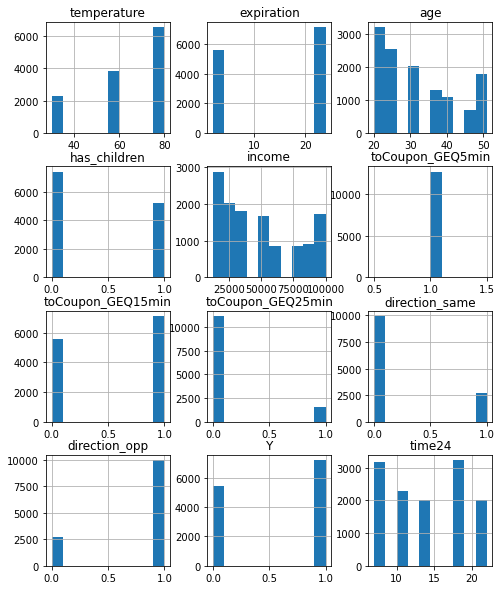

In [286]:
cleaned.hist(figsize=(8,10))

In [220]:
data.education.value_counts().sort_values()

Some High School                            88
High School Graduate                       905
Associates degree                         1153
Graduate degree (Masters or Doctorate)    1852
Bachelors degree                          4335
Some college - no degree                  4351
Name: education, dtype: int64

In [121]:
data.loc[data['car'] != 'N/A']

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Sales & Related,$12500 - $24999,Scooter and motorcycle,less1,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,0,Graduate degree (Masters or Doctorate),Sales & Related,$12500 - $24999,Scooter and motorcycle,less1,4~8,4~8,1~3,never,1,0,0,0,1,0
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Sales & Related,$12500 - $24999,Scooter and motorcycle,less1,4~8,4~8,1~3,never,1,0,0,0,1,1
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,0,Graduate degree (Masters or Doctorate),Sales & Related,$12500 - $24999,Scooter and motorcycle,less1,4~8,4~8,1~3,never,1,1,0,0,1,0
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Sales & Related,$12500 - $24999,Scooter and motorcycle,less1,4~8,4~8,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,1,0,1,1
8294,Work,Alone,Rainy,55,7AM,Restaurant(20-50),1d,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,1,0,1,1
8295,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,1,0,1,1
8296,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,1,0,1,1


In [10]:
data.Bar.value_counts()
# update with 'never'

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [11]:
data.CoffeeHouse.value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [12]:
data.CarryAway.value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [13]:
data.RestaurantLessThan20.value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [14]:
data.Restaurant20To50.value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

# Cleanup Data

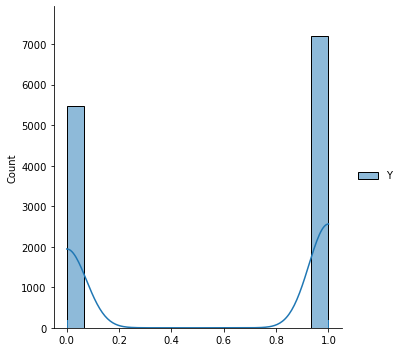

In [103]:
sns.displot(data[['Y']], kde=True, rug=True)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

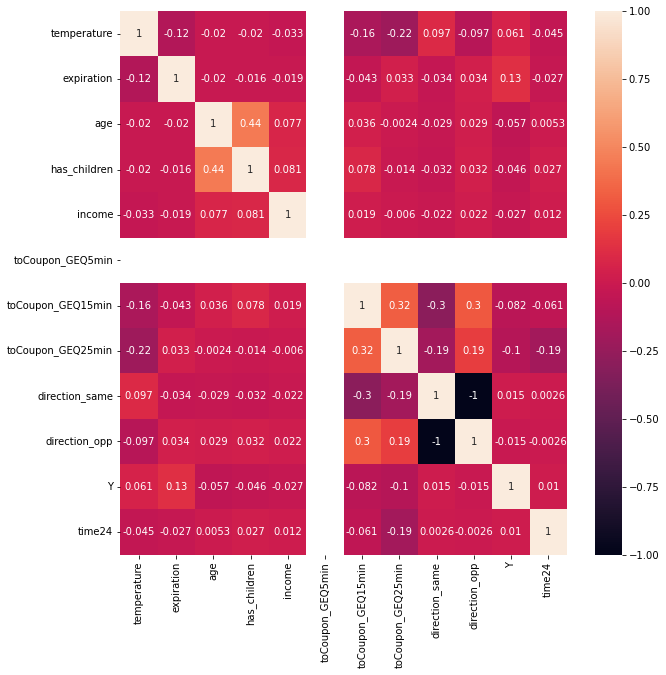

In [218]:
plt.tight_layout()
plt.subplots(figsize=(10,10))
#sns.set(font_scale=1.1)
sns.heatmap(cleaned.corr(), annot=True)

#### 4. What proportion of the total observations chose to accept the coupon? 



In [15]:
data.Y.value_counts(normalize=True)

1    0.568433
0    0.431567
Name: Y, dtype: float64

#### 5. Use a bar plot to visualize the `coupon` column.

In [23]:
# coupon column summary:
data.coupon.value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [55]:
# prepare data for bar plot
data[['coupon']].groupby('coupon').size().reset_index()

,coupon,0
0,Bar,2017
1,Carry out & Take away,2393
2,Coffee House,3996
3,Restaurant(20-50),1492
4,Restaurant(<20),2786


In [225]:
px.bar(data[['coupon']].groupby('coupon').size().reset_index(), x='coupon', color='coupon', y=0, text_auto=True,
      title='Types of Coupon', labels={'coupon':'Coupon','0':'Count'})

#### 6. Use a histogram to visualize the temperature column.

In [68]:
# Check column values
data.temperature.value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

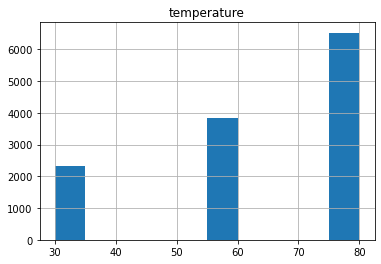

In [73]:
data[['temperature']].hist()

In [75]:
# check weather
data.weather.value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

# **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

####  1. Create a new `DataFrame` that contains just the bar coupons.


In [230]:
bars = cleaned[cleaned['coupon'] == 'Bar']

In [231]:
# Remove empty Bar rows for analysis
bars = bars.dropna(subset=['Bar'])

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

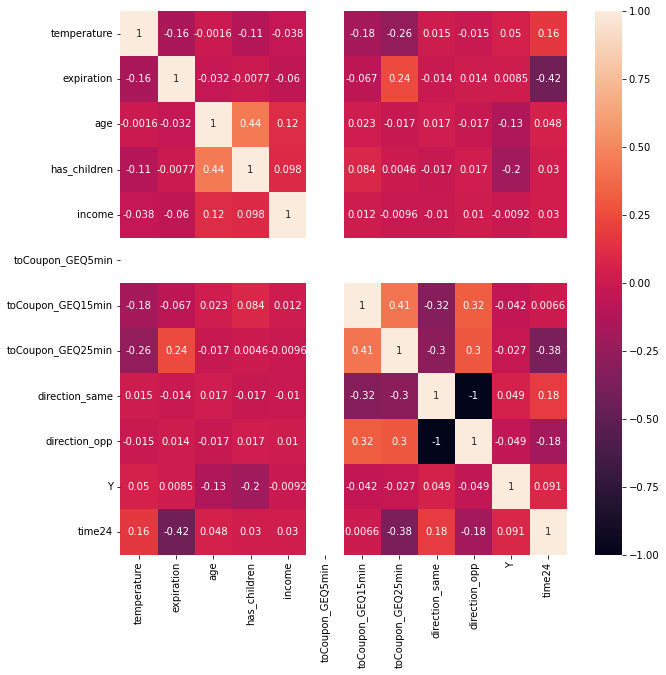

In [312]:
plt.tight_layout()
plt.subplots(figsize=(10,10))

#sns.set(font_scale=1.1)

sns.heatmap(bars.corr(), annot=True)

In [326]:
px.scatter(bars, x=['weather','maritalStatus','time'], color='Y')

In [330]:
px.histogram(bars, x='age', color='Y')

####  2. What proportion of bar coupons were accepted?


In [233]:
bars.Y.value_counts(normalize=True)

0    0.589679
1    0.410321
Name: Y, dtype: float64

####  3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [234]:
# Check Bar column
bars.Bar.value_counts().sort_values()

gt8       49
4~8      150
1~3      397
less1    570
never    830
Name: Bar, dtype: int64

In [235]:
# bar 3 or fewer times a month
bars[bars['Bar'].isin(['1~3', 'less1'])].Y.value_counts(normalize=True)

1    0.527404
0    0.472596
Name: Y, dtype: float64

In [236]:
#less1    3482
#1~3      2473
#4~8      1076
#gt8       349
bars[bars['Bar'].isin(['4~8', 'gt8'])].Y.value_counts(normalize=True)

1    0.768844
0    0.231156
Name: Y, dtype: float64

In [98]:
bars[bars['car'].notna()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Sales & Related,$12500 - $24999,Scooter and motorcycle,less1,4~8,4~8,1~3,never,1,0,0,0,1,1
1250,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Sales & Related,$12500 - $24999,Scooter and motorcycle,less1,4~8,4~8,1~3,never,1,0,0,1,0,0
1254,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Sales & Related,$12500 - $24999,Scooter and motorcycle,less1,4~8,4~8,1~3,never,1,1,1,0,1,0
2613,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,1,Bachelors degree,Legal,$100000 or More,crossover,never,1~3,1~3,1~3,less1,1,1,0,0,1,0
2617,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,1,Bachelors degree,Legal,$100000 or More,crossover,never,1~3,1~3,1~3,less1,1,0,0,1,0,0
2621,Work,Alone,Sunny,55,7AM,Bar,1d,Female,41,Married partner,1,Bachelors degree,Legal,$100000 or More,crossover,never,1~3,1~3,1~3,less1,1,1,1,0,1,0
3101,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$87500 - $99999,Mazda5,never,less1,1~3,1~3,less1,1,1,0,0,1,0
3105,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$87500 - $99999,Mazda5,never,less1,1~3,1~3,less1,1,0,0,1,0,0
3109,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$87500 - $99999,Mazda5,never,less1,1~3,1~3,less1,1,1,1,0,1,0
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,0,Bachelors degree,Office & Administrative Support,$87500 - $99999,do not drive,gt8,less1,1~3,1~3,1~3,1,1,0,0,1,1


####  4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [237]:
# All
# 0    0.589679
# 1    0.410321
# Population over age 25 and go to a bar more than once a month
bars[(bars['age'] > 25) & (bars['Bar'].isin(['1~3', '4~8', 'gt8']) )].Y.value_counts(normalize=True)

1    0.695238
0    0.304762
Name: Y, dtype: float64

Acceptance rate of "Population over age 25 and go to a bar more than once a month" is 28.5% more than overall population

####  5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [240]:
# First compare age group alone
bars[bars['age'] > 25].Y.value_counts(normalize=True)

0    0.616879
1    0.383121
Name: Y, dtype: float64

<AxesSubplot:ylabel='Frequency'>

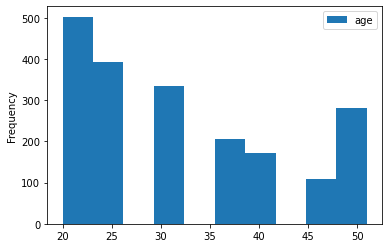

In [262]:
# all age group
bars.plot(kind='hist', y='age')

<AxesSubplot:ylabel='Frequency'>

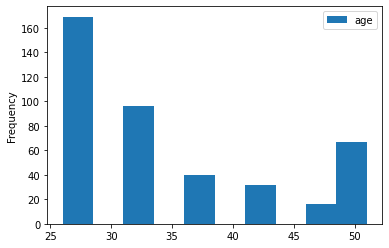

In [256]:
# Population over age 25 and go to a bar more than once a month
bars[(bars['age'] > 25) & (bars['Bar'].isin(['1~3', '4~8', 'gt8']) )].plot(kind='hist', y='age')

####  6. Using alpha at 0.05 test your hypothesis and state your conclusion.

Text(0, 0.5, 'Count')

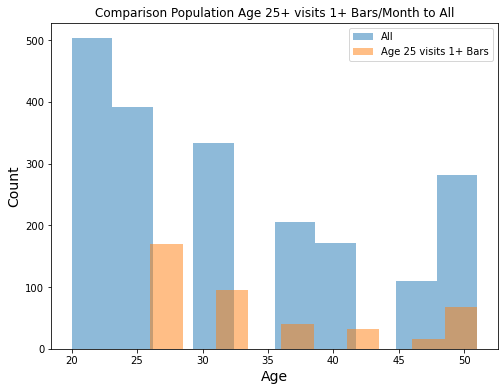

In [287]:
# Compare population over age 25 and go to a bar more than once a month to ALL!
plt.figure(figsize=(8,6))
plt.hist(bars[['age']], alpha=0.5, label='All')
plt.hist(bars[(bars['age'] > 25) & (bars['Bar'].isin(['1~3', '4~8', 'gt8']) )][['age']],
         alpha=0.5, label='Age 25 visits 1+ Bars')
plt.title("Comparison Population Age 25+ visits 1+ Bars/Month to All")
plt.legend(loc='upper right')
plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)

Text(0, 0.5, 'Count')

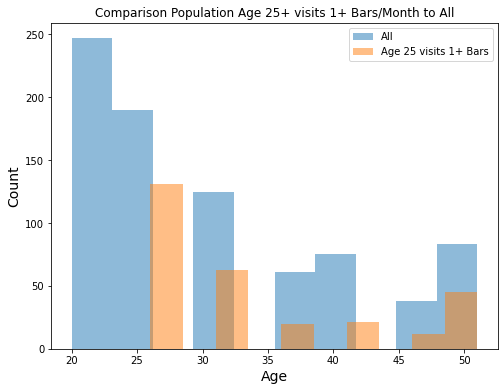

In [288]:
# Now compare population over age 25 and go to a bar more than once a month to ALL for who accepts coupon!
plt.figure(figsize=(8,6))
plt.hist(bars[bars['Y'] == 1][['age']], alpha=0.5, label='All')
plt.hist(bars[(bars['Y'] == 1) & (bars['age'] > 25) & (bars['Bar'].isin(['1~3', '4~8', 'gt8']) )][['age']],
         alpha=0.5, label='Age 25 visits 1+ Bars')
plt.title("Comparison Population Age 25+ visits 1+ Bars/Month to All")
plt.legend(loc='upper right')
plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)

##### Conclusion
There is a general trend here among who is over 25 and go to bars more than once a month comparing to all, young people go bars more often and slowly declines over age and picks up again at the age of 50.
The same trend also exists in the same population who accepted coupon.

####  7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [293]:
# Check passanger column
bars.passanger.value_counts()

Alone        1192
Friend(s)     331
Partner       270
Kid(s)        203
Name: passanger, dtype: int64

In [295]:
#check occupation column
bars.occupation.value_counts()

Unemployed                                   298
Student                                      251
Computer & Mathematical                      228
Sales & Related                              178
Education&Training&Library                   137
Management                                   118
Office & Administrative Support              105
Arts Design Entertainment Sports & Media      91
Business & Financial                          88
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

In [296]:
bars[bars['Y'] == 1].occupation.value_counts()

Student                                      120
Unemployed                                    90
Computer & Mathematical                       83
Sales & Related                               80
Management                                    65
Office & Administrative Support               53
Business & Financial                          41
Education&Training&Library                    38
Arts Design Entertainment Sports & Media      32
Healthcare Support                            29
Food Preparation & Serving Related            23
Healthcare Practitioners & Technical          18
Architecture & Engineering                    18
Retired                                       18
Life Physical Social Science                  15
Protective Service                            13
Construction & Extraction                     13
Community & Social Services                   13
Production Occupations                        12
Legal                                         12
Personal Care & Serv

In [294]:
# Population go to a bar more than once a month with Friends or Partner whose occupation is not Farming Fishing & Forestry
bars[(bars['passanger'].isin(['Friend(s)','Partner'])) &
     (bars['occupation'] != 'Farming Fishing & Forestry') &
     (bars['Bar'].isin(['1~3', '4~8', 'gt8']) )].Y.value_counts(normalize=True)

1    0.717949
0    0.282051
Name: Y, dtype: float64

####  8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [302]:
bars.RestaurantLessThan20.value_counts()

1~3      871
4~8      563
less1    325
gt8      186
never     37
Name: RestaurantLessThan20, dtype: int64

In [307]:
# Population go to a bar more than once a month with Friends or Partner who are not Widowed
bars[(bars['passanger'].isin(['Friend(s)','Partner'])) &
     (bars['maritalStatus'] != 'Widowed') &
     (bars['Bar'].isin(['1~3', '4~8', 'gt8']) )].Y.value_counts()

1    140
0     55
Name: Y, dtype: int64

In [309]:
# Population go to a bar more than once a month who are younger than 30
bars[(bars['age'] < 30) &
     (bars['Bar'].isin(['1~3', '4~8', 'gt8']) )].Y.value_counts()

1    249
0     96
Name: Y, dtype: int64

In [308]:
# Population go to cheap restaurants more than 4 times a month and income is less than 50K.
bars[(bars['RestaurantLessThan20'].isin(['4~8', 'gt8']) ) &
     (bars['income'] < 50000)].Y.value_counts()

0    184
1    155
Name: Y, dtype: int64

#### 9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  